In [21]:
import pandas as pd
df = pd.read_csv("c:/data/wine/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [22]:
df["class"].value_counts()

class
1    855
0    744
Name: count, dtype: int64

In [23]:
train_cols = df.columns[0:11] # 0 ~ 10 필드
X = df[train_cols]
y = df["class"]

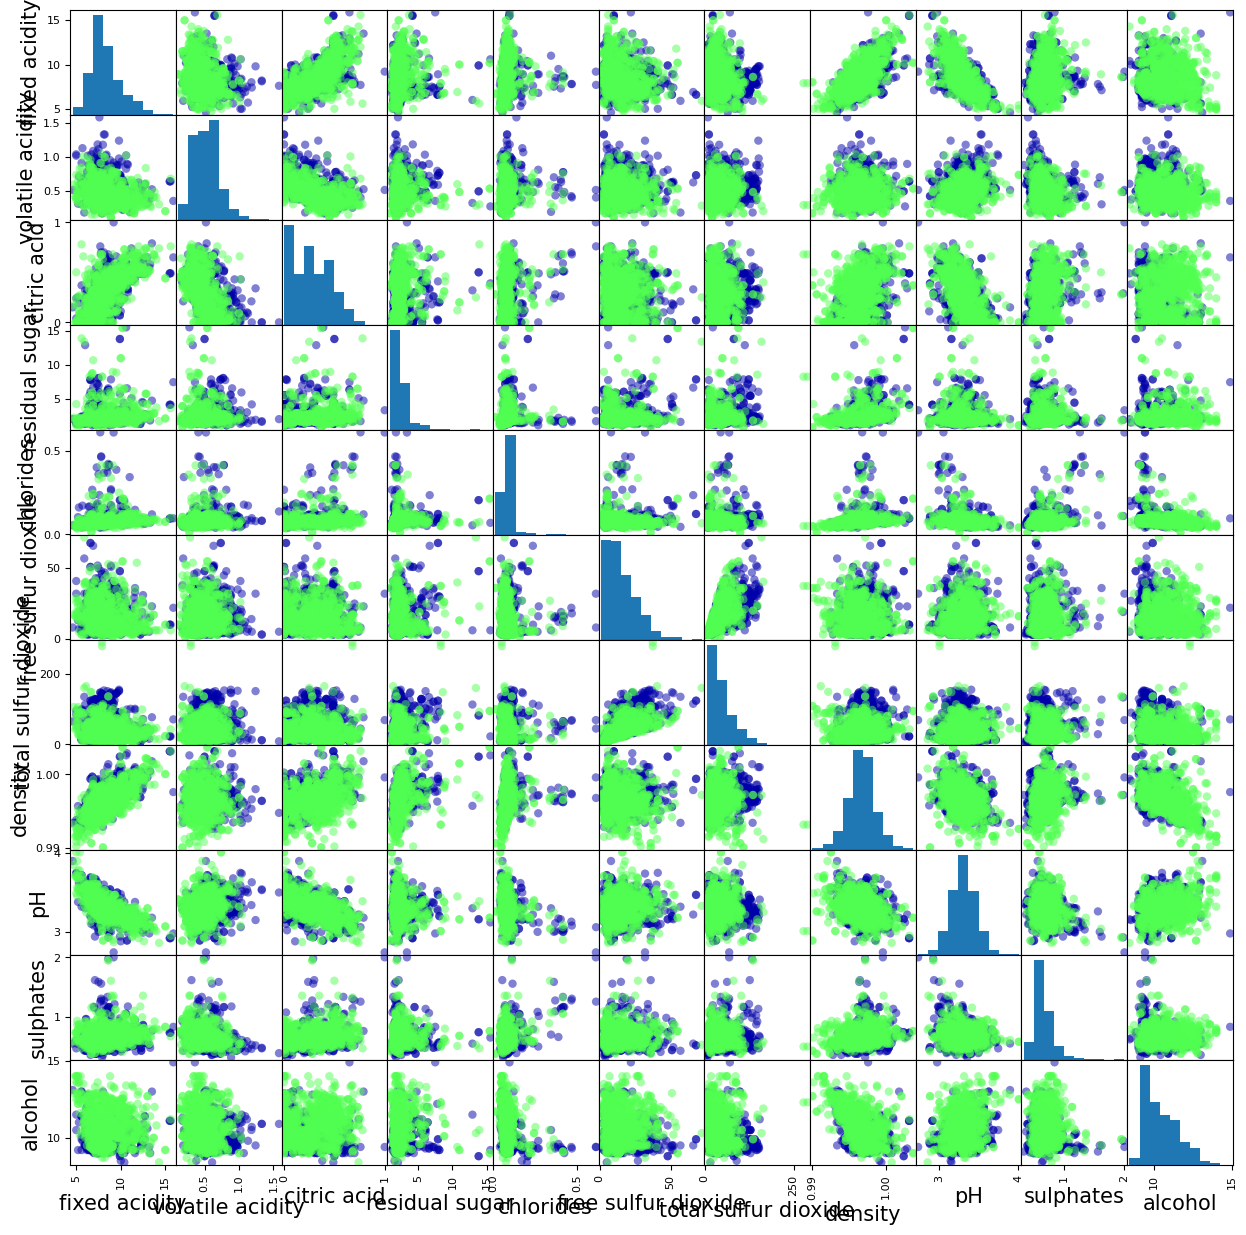

In [24]:
import mglearn
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)
plt.show()

In [25]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2["class"].value_counts()

class
0    744
1    744
Name: count, dtype: int64

In [26]:
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [28]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [29]:
import numpy as np

pred = model.predict(X_test)
print("학습용:" , model.score(X_train, y_train))
print("검증용:" , model.score(X_test, y_test))
print("검증용:" , np.mean(pred == y_test))

학습용: 0.7445378151260504
검증용: 0.7449664429530202
검증용: 0.7449664429530202


In [30]:
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준편차로 나누면
# 평귱 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) /std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) /std_on_train

In [31]:
# 표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 최대 반복횟수에 도달했다는 경고 : max_iter 반복횟수를 늘려야함 

c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=0)

In [32]:
print("학습용" , model.score(X_train_scaled, y_train))
print("검증용", model.score(X_test_scaled, y_test))

# 예측률이 향상됨

학습용 0.9369747899159664
검증용 0.8288590604026845


In [33]:
# 최대 반복 횟수 max_iter 를 늘림
model = MLPClassifier(max_iter=3000, random_state=42)
model.fit(X_train_scaled, y_train)

print("학습용 :",model.score(X_train_scaled, y_train) )
print("검증용 :",model.score(X_test_scaled, y_test) )

# 예측률이 향상됨

학습용 : 0.9327731092436975
검증용 : 0.825503355704698


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# 은닉층을 2개로 늘림
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100, 100], random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용 : ", model.score(X_train_scaled, y_train))
print("검증용 : ", model.score(X_test_scaled, y_test))

# 예측률이 향상됨

학습용 :  0.9991596638655462
검증용 :  0.8187919463087249


In [35]:
# 은닉층을 3개로 늘림
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100, 100, 100], random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용 : ", model.score(X_train_scaled, y_train))
print("검증용 : ", model.score(X_test_scaled, y_test))

# 더이상 개선되지 않음

학습용 :  1.0
검증용 :  0.7919463087248322


In [36]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[117,  30],
       [ 32, 119]], dtype=int64)

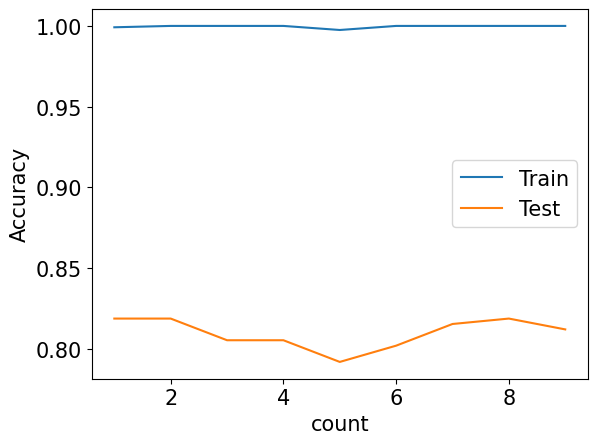

In [37]:
# 최적의 은닉노드 개수를 구하기 위한 실험
import numpy as np
import matplotlib.pyplot as plt

train_rate = []
test_rate = []
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): # 두번쨰 은닉층의 노드수 100~ 300
        model = MLPClassifier(random_state=0, hidden_layer_sizes=[i, j], max_iter=1000)
        model.fit(X_train_scaled, y_train)
        train_rate.append(model.score(X_train_scaled, y_train))
        test_rate.append(model.score(X_test_scaled, y_test))

plt.rcParams['font.size']=15
plt.plot(range(1,10), train_rate, label='Train')
plt.plot(range(1,10), test_rate, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [40]:
test_rate

[0.8187919463087249,
 0.8187919463087249,
 0.8053691275167785,
 0.8053691275167785,
 0.7919463087248322,
 0.802013422818792,
 0.8154362416107382,
 0.8187919463087249,
 0.8120805369127517]

In [41]:
max_rate = max(test_rate) # 최대값
# argmax : 최대값의 인덱스
idx = np.argmax(test_rate)
print('idx :', idx)
print('최고정확도:', max_rate)
cnt = 0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i, j)
        cnt += 1

idx : 0
최고정확도: 0.8187919463087249
100 100


In [39]:
# 실험을 통해 구한 최적의 은닉노드수로 만든 모형
model = MLPClassifier(hidden_layer_sizes=[300,100], random_state=0)
model.fit(X_train_scaled, y_train)
print(f'학습용:{model.score(X_train_scaled, y_train)*100:6.2f}%')
print(f'검증용:{model.score(X_test_scaled, y_test)*100:6.2f}%')

학습용: 99.58%
검증용: 84.23%


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
